## Most Valuable Player Prediction using IPL Dataset 

### Importing libraries to be used

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('Ops').getOrCreate()

### Getting pre-processed data from the csv files

In [3]:
deliveries = spark.read.csv('Desktop/IPL-MSDR-master/ipldata/Data files after cleaning/new_deliveries.csv',inferSchema = True, header = True)
matches = spark.read.csv('Desktop/IPL-MSDR-master/ipldata/Data files after cleaning/new_matches.csv',inferSchema = True, header = True)

In [4]:
deliveries.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)
 |-- over: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- is_super_over: integer (nullable = true)
 |-- wide_runs: integer (nullable = true)
 |-- bye_runs: integer (nullable = true)
 |-- legbye_runs: integer (nullable = true)
 |-- noball_runs: integer (nullable = true)
 |-- penalty_runs: integer (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- fielder: string (nullable = true)



In [5]:
matches.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- season: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- result: string (nullable = true)
 |-- dl_applied: integer (nullable = true)
 |-- winner: string (nullable = true)
 |-- win_by_runs: integer (nullable = true)
 |-- win_by_wickets: integer (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue: string (nullable = true)



### Total Number of Matches In Each Season

In [6]:
matches.registerTempTable('seasons')
seasons = spark.sql('''Select distinct(season),count(*) as total_matches from seasons group by season ''') 
seasons.show()

+------+-------------+
|season|total_matches|
+------+-------------+
|  2018|           60|
|  2015|           59|
|  2013|           76|
|  2014|           60|
|  2019|           60|
|  2012|           74|
|  2009|           57|
|  2016|           60|
|  2010|           60|
|  2011|           73|
|  2008|           58|
|  2017|           59|
+------+-------------+



Text(0.5,1,'Number of matches in each season')

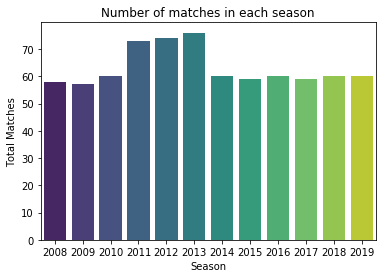

In [7]:
fig, a = plt.subplots()
a = sns.barplot(x ="season", y="total_matches", data=seasons.toPandas(),palette='viridis')
a.set_xlabel('Season')
a.set_ylabel('Total Matches')
a.set_title('Number of matches in each season')

#### Summary of the above data

In [8]:
seasons.describe('total_matches').show()

+-------+-----------------+
|summary|    total_matches|
+-------+-----------------+
|  count|               12|
|   mean|             63.0|
| stddev|6.928203230275509|
|    min|               57|
|    max|               76|
+-------+-----------------+



### Number of matches played by each team from 2008 to 2019

In [9]:
matches.registerTempTable('team')
team = spark.sql('''Select distinct(team), count(*) as total_matches from (Select team1 as team from team UNION ALL (select team2 as team from team)) group by team ''')
team.show()

+--------------------+-------------+
|                team|total_matches|
+--------------------+-------------+
| Sunrisers Hyderabad|          108|
| Chennai Super Kings|          164|
|     Deccan Chargers|           75|
|Kochi Tuskers Kerala|           14|
|    Rajasthan Royals|          147|
|       Gujarat Lions|           30|
|Royal Challengers...|          180|
|Kolkata Knight Ri...|          178|
|Rising Pune Super...|           30|
|     Kings XI Punjab|          176|
|       Pune Warriors|           46|
|    Delhi Daredevils|          161|
|      Delhi Capitals|           16|
|      Mumbai Indians|          187|
+--------------------+-------------+



Text(0.5,1,'Number of matches played by each team')

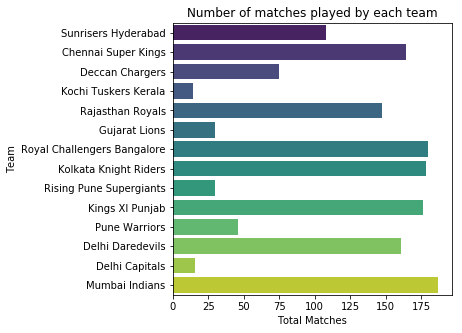

In [10]:
fig, a = plt.subplots(figsize = (5,5))
a = sns.barplot(x ="total_matches", y="team", data=team.toPandas(), palette='viridis')
a.set_ylabel('Team')
a.set_xlabel('Total Matches')
a.set_title('Number of matches played by each team')

### Total seasons in which the team has played

In [12]:
matches.registerTempTable('team_season')
team_season = spark.sql('''Select team1 as team, min(season) as first_season, max(season) as last_season, count(distinct(season)) as total_seasons from team_season group by team1 order by total_seasons desc''')
team_season.show()

+--------------------+------------+-----------+-------------+
|                team|first_season|last_season|total_seasons|
+--------------------+------------+-----------+-------------+
|     Kings XI Punjab|        2008|       2019|           12|
|Royal Challengers...|        2008|       2019|           12|
|      Mumbai Indians|        2008|       2019|           12|
|Kolkata Knight Ri...|        2008|       2019|           12|
|    Delhi Daredevils|        2008|       2018|           11|
|    Rajasthan Royals|        2008|       2019|           10|
| Chennai Super Kings|        2008|       2019|           10|
| Sunrisers Hyderabad|        2013|       2019|            7|
|     Deccan Chargers|        2008|       2012|            5|
|       Pune Warriors|        2011|       2013|            3|
|       Gujarat Lions|        2016|       2017|            2|
|Rising Pune Super...|        2016|       2017|            2|
|Kochi Tuskers Kerala|        2011|       2011|            1|
|      D

### Total number of matches won by the teams

In [13]:
matches.registerTempTable('most_win')
most_win = spark.sql('''Select distinct(winner) as team, count(*) as total_matches from most_win where winner <>'None' group by winner order by total_matches ''')
most_win.show()

+--------------------+-------------+
|                team|total_matches|
+--------------------+-------------+
|Rising Pune Super...|            5|
|Kochi Tuskers Kerala|            6|
|Rising Pune Super...|           10|
|      Delhi Capitals|           10|
|       Pune Warriors|           12|
|       Gujarat Lions|           13|
|     Deccan Chargers|           29|
| Sunrisers Hyderabad|           58|
|    Delhi Daredevils|           67|
|    Rajasthan Royals|           75|
|     Kings XI Punjab|           82|
|Royal Challengers...|           84|
|Kolkata Knight Ri...|           92|
| Chennai Super Kings|          100|
|      Mumbai Indians|          109|
+--------------------+-------------+



Text(0.5,1,'Number of matches won by each team')

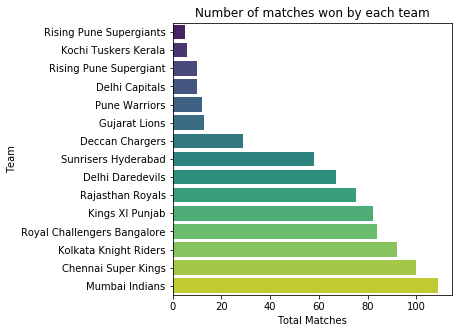

In [15]:
fig, a = plt.subplots(figsize = (5,5))
a = sns.barplot(x ="total_matches", y="team", data=most_win.toPandas(), palette='viridis')
a.set_ylabel('Team')
a.set_xlabel('Total Matches')
a.set_title('Number of matches won by each team')

### Total matches won by teams in each season

In [16]:
matches.registerTempTable('most_win_by_season')
most_win_by_season = spark.sql('''Select season, winner as team, count(*) as total_matches_won from most_win_by_season where winner <> 'None' group by season, winner order by total_matches_won desc''')
most_win_by_season.show()

+------+--------------------+-----------------+
|season|                team|total_matches_won|
+------+--------------------+-----------------+
|  2013|      Mumbai Indians|               13|
|  2008|    Rajasthan Royals|               13|
|  2014|     Kings XI Punjab|               12|
|  2013| Chennai Super Kings|               12|
|  2012|Kolkata Knight Ri...|               12|
|  2017|      Mumbai Indians|               12|
|  2018| Chennai Super Kings|               11|
|  2011| Chennai Super Kings|               11|
|  2013|    Rajasthan Royals|               11|
|  2019|      Mumbai Indians|               11|
|  2012|    Delhi Daredevils|               11|
|  2016| Sunrisers Hyderabad|               11|
|  2014|Kolkata Knight Ri...|               11|
|  2010|      Mumbai Indians|               11|
|  2012| Chennai Super Kings|               10|
|  2014| Chennai Super Kings|               10|
|  2009|    Delhi Daredevils|               10|
|  2017|Rising Pune Super...|           

#### Total matches won by teams in 2019

In [17]:
matches.registerTempTable('most_win_2019')
most_win_2019 = spark.sql('''Select season, winner as team, count(*) as total_matches_won from most_win_2019 where winner <> 'None' and season = 2019 group by season, winner order by total_matches_won desc''')
most_win_2019.show()

+------+--------------------+-----------------+
|season|                team|total_matches_won|
+------+--------------------+-----------------+
|  2019|      Mumbai Indians|               11|
|  2019| Chennai Super Kings|               10|
|  2019|      Delhi Capitals|               10|
|  2019|     Kings XI Punjab|                6|
|  2019|Kolkata Knight Ri...|                6|
|  2019| Sunrisers Hyderabad|                6|
|  2019|Royal Challengers...|                5|
|  2019|    Rajasthan Royals|                5|
+------+--------------------+-----------------+



Text(0.5,1,'Number of matches won by each team in 2019')

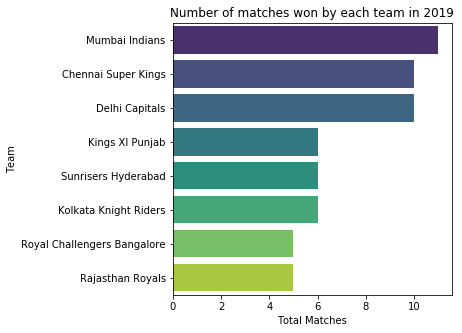

In [18]:
fig, a = plt.subplots(figsize = (5,5))
a = sns.barplot(x ="total_matches_won", y="team", data=most_win_2019.toPandas(), palette='viridis')
a.set_ylabel('Team')
a.set_xlabel('Total Matches')
a.set_title('Number of matches won by each team in 2019')

### Players of the matches with max matches

In [19]:
matches.registerTempTable('man_match')
man_match = spark.sql('''Select distinct(player_of_match), count(*) as total_matches from man_match group by player_of_match order by total_matches desc limit 10 ''')
man_match.show()

+---------------+-------------+
|player_of_match|total_matches|
+---------------+-------------+
|       CH Gayle|           21|
| AB de Villiers|           20|
|      RG Sharma|           17|
|      DA Warner|           17|
|       MS Dhoni|           17|
|      YK Pathan|           16|
|      SR Watson|           15|
|       SK Raina|           14|
|      G Gambhir|           13|
|      AM Rahane|           12|
+---------------+-------------+



Text(0.5,1,'Number of times player won man of the match')

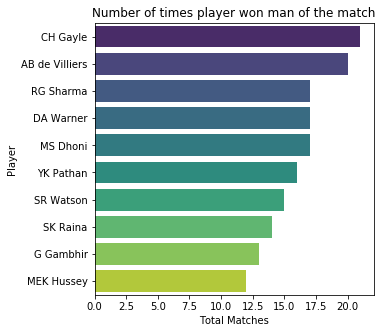

In [20]:
fig, a = plt.subplots(figsize = (5,5))
a = sns.barplot(x ="total_matches", y="player_of_match", data=man_match.toPandas(), palette='viridis')
a.set_xlabel('Total Matches')
a.set_ylabel('Player')
a.set_title('Number of times player won man of the match')

### Number of matches at each venue

In [21]:
matches.registerTempTable('venue')
venue = spark.sql('''Select distinct(venue), count(*) as total_matches from venue group by venue''')
venue.show()

+--------------------+-------------+
|               venue|total_matches|
+--------------------+-------------+
|Dubai Internation...|            7|
|Himachal Pradesh ...|            9|
|Sardar Patel Stad...|           12|
|Punjab Cricket As...|           35|
|    Barabati Stadium|            7|
|Punjab Cricket As...|           14|
|       Nehru Stadium|            5|
|Maharashtra Crick...|           21|
|        Eden Gardens|           77|
|     OUTsurance Oval|            2|
|M Chinnaswamy Sta...|           73|
|    Feroz Shah Kotla|           67|
|M. A. Chidambaram...|            8|
|Rajiv Gandhi Inte...|           56|
|   Brabourne Stadium|           11|
|Vidarbha Cricket ...|            3|
|          Green Park|            4|
|Holkar Cricket St...|            9|
|Feroz Shah Kotla ...|            7|
|Shaheed Veer Nara...|            6|
+--------------------+-------------+
only showing top 20 rows



Text(0.5,1,'Number of matches at each venue')

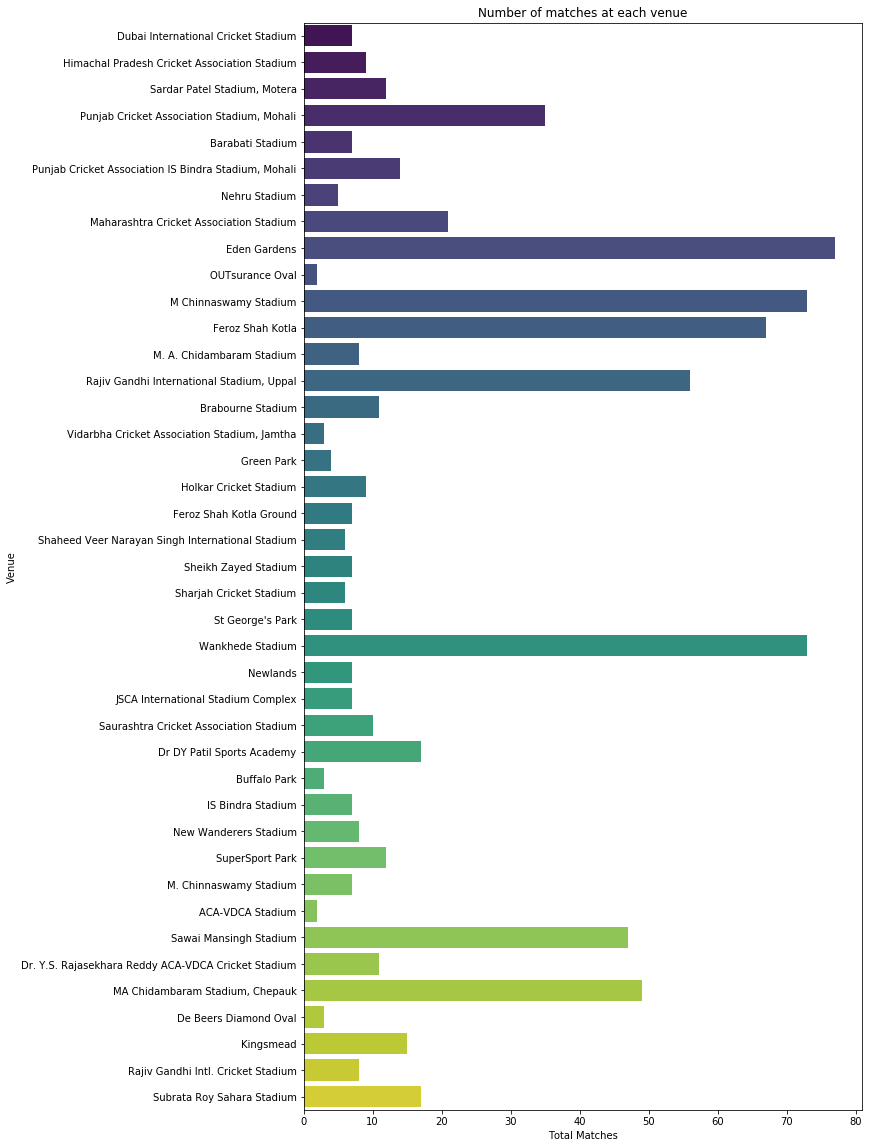

In [22]:
fig, a = plt.subplots(figsize = (10,20))
a = sns.barplot(x ="total_matches", y="venue", data=venue.toPandas(), palette='viridis')
a.set_ylabel('Venue')
a.set_xlabel('Total Matches')
a.set_title('Number of matches at each venue')

### Toss Decision by teams

In [23]:
matches.registerTempTable('toss')
toss = spark.sql('''Select distinct(toss_decision), ((count(toss_decision)*100)/ (select count(*) from toss)) as percentage_count from toss group by toss_decision''')
toss.show()

+-------------+-----------------+
|toss_decision| percentage_count|
+-------------+-----------------+
|        field|61.24338624338624|
|          bat|38.75661375661376|
+-------------+-----------------+



Text(0.5,1,'Percentage Plot of toss_decision')

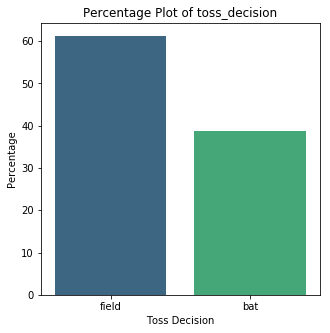

In [24]:
fig, a = plt.subplots(figsize = (5,5))
a = sns.barplot(x ="toss_decision", y="percentage_count", data=toss.toPandas(), palette='viridis')
a.set_ylabel('Percentage')
a.set_xlabel('Toss Decision')
a.set_title('Percentage Plot of toss_decision')

### Percentage of teams who won the toss followed by winning the match

In [25]:
matches.registerTempTable('toss_and_won')
matches.registerTempTable('toss_won_data')
toss_won_data = spark.sql('''Select t1.season, t1.total_matches, \
          t2.count_toss_and_won as count_toss_and_won, \
          (t2.count_toss_and_won / t1.total_matches * 100) as percent_toss_and_won from \
          (Select distinct(season),count(*) as total_matches from seasons group by season)t1 \
          left join (Select distinct(season), count(*) as count_toss_and_won from toss_and_won where toss_winner = winner group by season)t2 on t1.season = t2.season order by season''')
toss_won_data.show()

+------+-------------+------------------+--------------------+
|season|total_matches|count_toss_and_won|percent_toss_and_won|
+------+-------------+------------------+--------------------+
|  2008|           58|                28|  48.275862068965516|
|  2009|           57|                33|   57.89473684210527|
|  2010|           60|                31|   51.66666666666667|
|  2011|           73|                38|  52.054794520547944|
|  2012|           74|                33|    44.5945945945946|
|  2013|           76|                36|  47.368421052631575|
|  2014|           60|                30|                50.0|
|  2015|           59|                28|   47.45762711864407|
|  2016|           60|                34|  56.666666666666664|
|  2017|           59|                34|    57.6271186440678|
|  2018|           60|                32|  53.333333333333336|
|  2019|           60|                36|                60.0|
+------+-------------+------------------+--------------

Text(0.5,1,'Percentage Plot of Season and Toss_and_won')

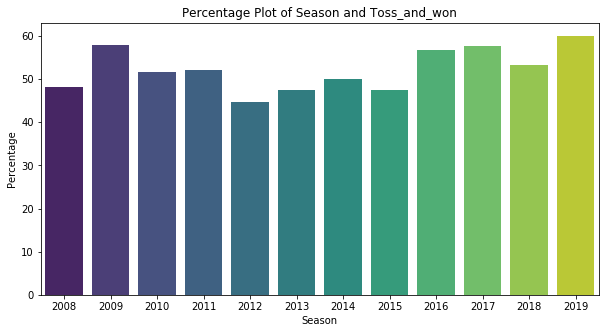

In [26]:
fig, a = plt.subplots(figsize = (10,5))
a = sns.barplot(x ="season", y="percent_toss_and_won", data=toss_won_data.toPandas(), palette='viridis')
a.set_ylabel('Percentage')
a.set_xlabel('Season')
a.set_title('Percentage Plot of Season and Toss_and_won')

### Percentage of matches won by batting first

In [27]:
win_batting_first = spark.sql('''Select t1.season, t1.total_matches, \
          t2.win_batting_first as win_batting_first, \
          (t2.win_batting_first/ t1.total_matches * 100) as percent_win_batting_first from \
          (Select distinct(season),count(*) as total_matches from seasons group by season)t1 \
          left join (Select distinct(season), count(*) as win_batting_first from seasons where win_by_runs > 0  group by season)t2 on t1.season = t2.season order by season ''')
win_batting_first.show()

+------+-------------+-----------------+-------------------------+
|season|total_matches|win_batting_first|percent_win_batting_first|
+------+-------------+-----------------+-------------------------+
|  2008|           58|               24|        41.37931034482759|
|  2009|           57|               27|       47.368421052631575|
|  2010|           60|               31|        51.66666666666667|
|  2011|           73|               33|        45.20547945205479|
|  2012|           74|               34|        45.94594594594595|
|  2013|           76|               37|        48.68421052631579|
|  2014|           60|               22|       36.666666666666664|
|  2015|           59|               32|        54.23728813559322|
|  2016|           60|               21|                     35.0|
|  2017|           59|               26|        44.06779661016949|
|  2018|           60|               28|       46.666666666666664|
|  2019|           60|               22|       36.666666666666

Text(0.5,1,'Percentage Plot of Season and won by batting ')

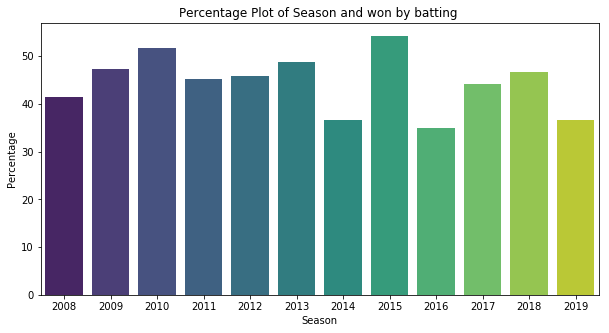

In [28]:
fig, a = plt.subplots(figsize = (10,5))
a = sns.barplot(x ="season", y="percent_win_batting_first", data=win_batting_first.toPandas(), palette='viridis')
a.set_ylabel('Percentage')
a.set_xlabel('Season')
a.set_title('Percentage Plot of Season and won by batting ')

### Percentage of matches won by bowling/ fielding first

In [29]:
win_bowling_first = spark.sql('''Select t1.season, t1.total_matches, \
          t2.win_bowling_first as win_bowling_first, \
          (t2.win_bowling_first/ t1.total_matches * 100) as percent_win_bowling_first from \
          (Select distinct(season),count(*) as total_matches from seasons group by season)t1 \
          left join (Select distinct(season), count(*) as win_bowling_first from seasons where win_by_wickets > 0  group by season)t2 on t1.season = t2.season order by season ''')
win_bowling_first.show()

+------+-------------+-----------------+-------------------------+
|season|total_matches|win_bowling_first|percent_win_bowling_first|
+------+-------------+-----------------+-------------------------+
|  2008|           58|               34|       58.620689655172406|
|  2009|           57|               29|       50.877192982456144|
|  2010|           60|               28|       46.666666666666664|
|  2011|           73|               39|        53.42465753424658|
|  2012|           74|               40|       54.054054054054056|
|  2013|           76|               37|        48.68421052631579|
|  2014|           60|               37|        61.66666666666667|
|  2015|           59|               24|        40.67796610169492|
|  2016|           60|               39|                     65.0|
|  2017|           59|               32|        54.23728813559322|
|  2018|           60|               32|       53.333333333333336|
|  2019|           60|               35|       58.333333333333

Text(0.5,1,'Percentage Plot of Season and won by wickets ')

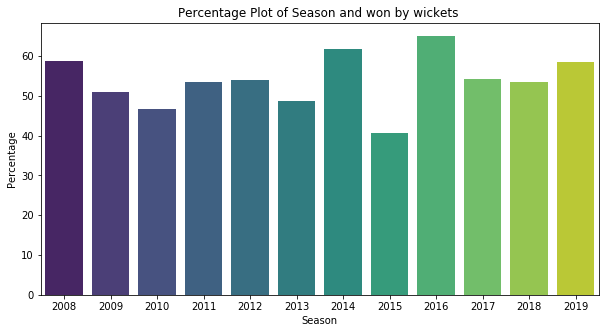

In [30]:
fig, a = plt.subplots(figsize = (10,5))
a = sns.barplot(x ="season", y="percent_win_bowling_first", data=win_bowling_first.toPandas(), palette='viridis')
a.set_ylabel('Percentage')
a.set_xlabel('Season')
a.set_title('Percentage Plot of Season and won by wickets ')